In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=101)

In [8]:
ytrain.value_counts()

absent     47
present     9
Name: Kyphosis, dtype: int64

In [9]:
dectree = DecisionTreeClassifier(criterion = 'entropy')

In [10]:
dectree.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dectree, out_file = dot_data, filled = True, rounded = True, feature_names = xtrain.columns,
              class_names = ytrain.unique(), special_characters = True)

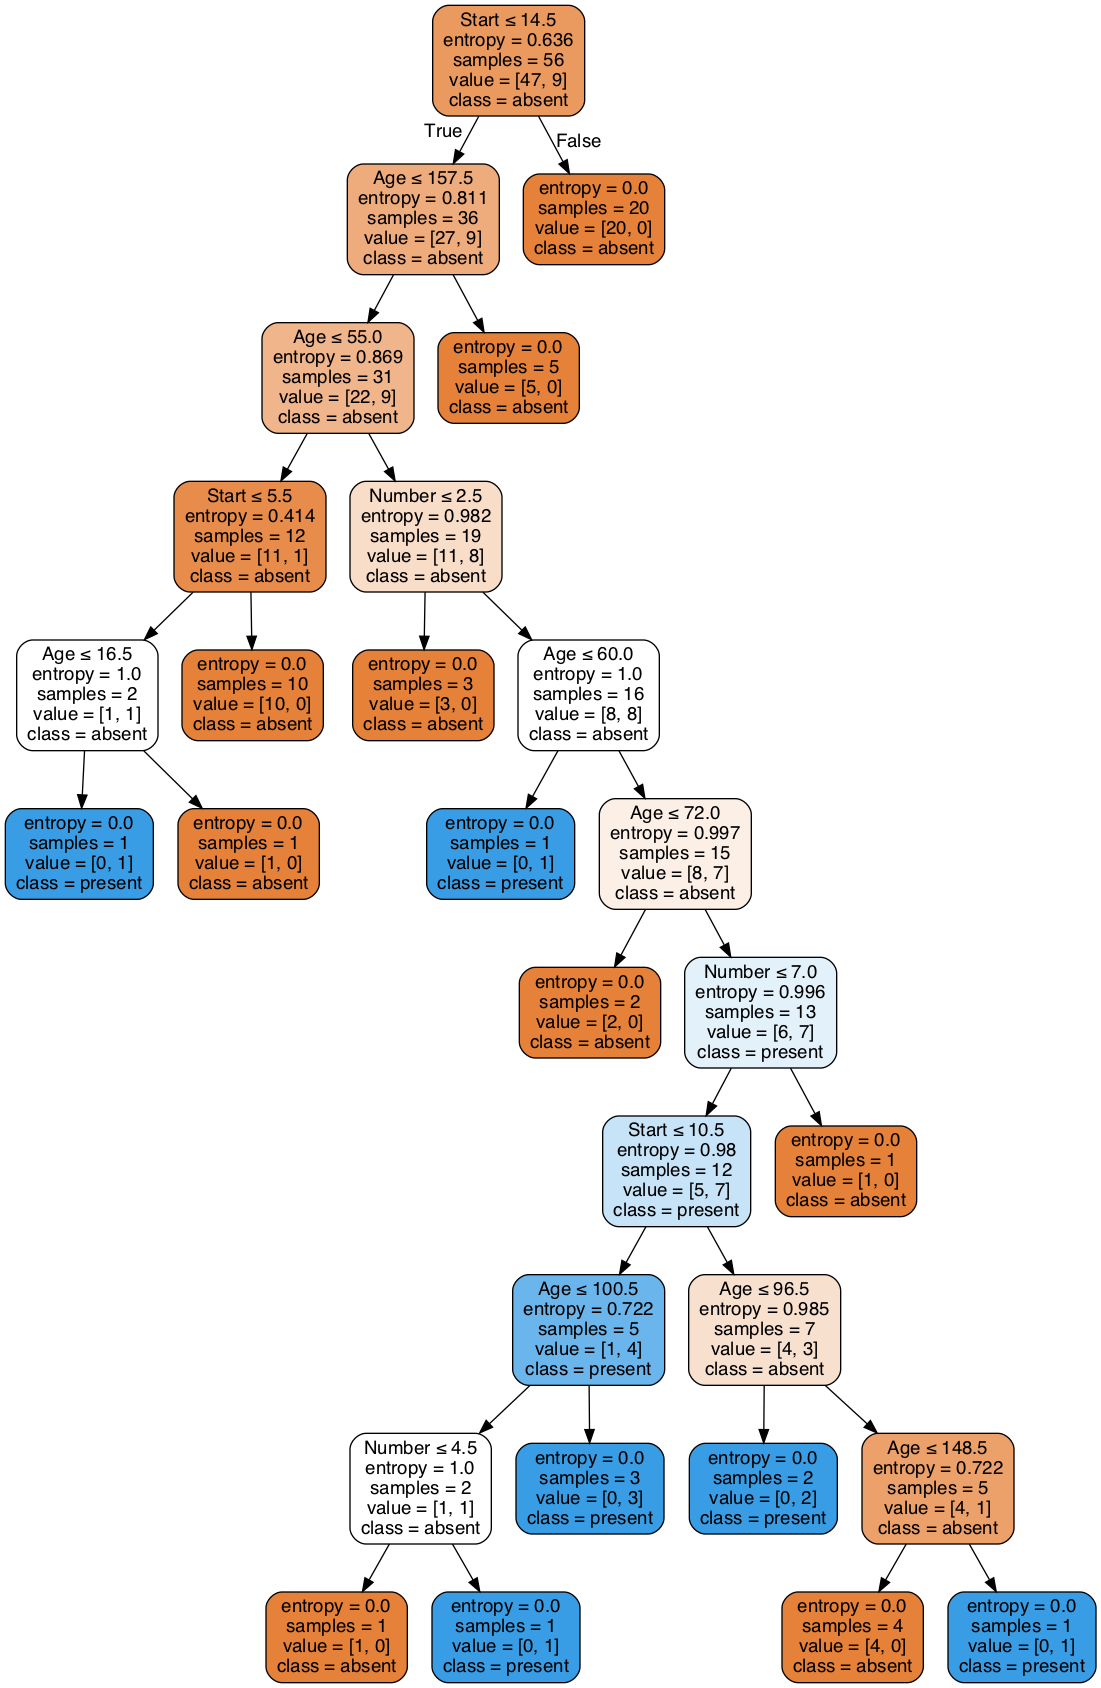

In [14]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [15]:
pred = dectree.predict(xtest)

In [16]:
pred

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent'], dtype=object)

In [20]:
z = []
for i, j in zip(pred, ytest):
    z.append([i,j])
pd.DataFrame(z).head()

0        1
0   absent   absent
1  present  present
2  present  present
3   absent   absent
4   absent   absent

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
accuracy_score(pred, ytest)

0.84

In [26]:
confusion_matrix(ytest, pred)

array([[16,  1],
       [ 3,  5]])

## Latihan 1

In [55]:
titanic = pd.read_csv('titanic_train.csv')

In [56]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
def isidata(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isna(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [58]:
titanic['Age'] = titanic[['Age','Pclass']].apply(isidata,axis=1)

In [59]:
titanic.drop('Cabin', axis = 1, inplace = True)

In [60]:
titanic.dropna(inplace = True)

In [61]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [62]:
titanic.drop(['PassengerId', 'Name', 'Ticket'],axis=1,inplace=True)

In [63]:
titanic.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [64]:
titanic = pd.get_dummies (data = titanic, drop_first = True, columns = ['Pclass', 'Sex', 'SibSp', 'Embarked'])

In [65]:
titanic.head()

Survived   Age  Parch     Fare  Pclass_2  Pclass_3  Sex_male  SibSp_1  \
0         0  22.0      0   7.2500         0         1         1        1   
1         1  38.0      0  71.2833         0         0         0        1   
2         1  26.0      0   7.9250         0         1         0        0   
3         1  35.0      0  53.1000         0         0         0        1   
4         0  35.0      0   8.0500         0         1         1        0   

   SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Embarked_Q  Embarked_S  
0        0        0        0        0        0           0           1  
1        0        0        0        0        0           0           0  
2        0        0        0        0        0           0           1  
3        0        0        0        0        0           0           1  
4        0        0        0        0        0           0           1

In [88]:
x = titanic[['Age','Pclass_2','Pclass_3','Sex_male']]
y = titanic['Survived']

In [89]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=101)

In [90]:
ytrain.value_counts()

0    386
1    236
Name: Survived, dtype: int64

In [91]:
dectree = DecisionTreeClassifier(criterion = 'entropy')

In [92]:
dectree.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [93]:
dot_data = StringIO()
export_graphviz(dectree, out_file = dot_data, filled = True, rounded = True, feature_names = xtrain.columns,
              class_names = str(ytrain.unique()), special_characters = True)

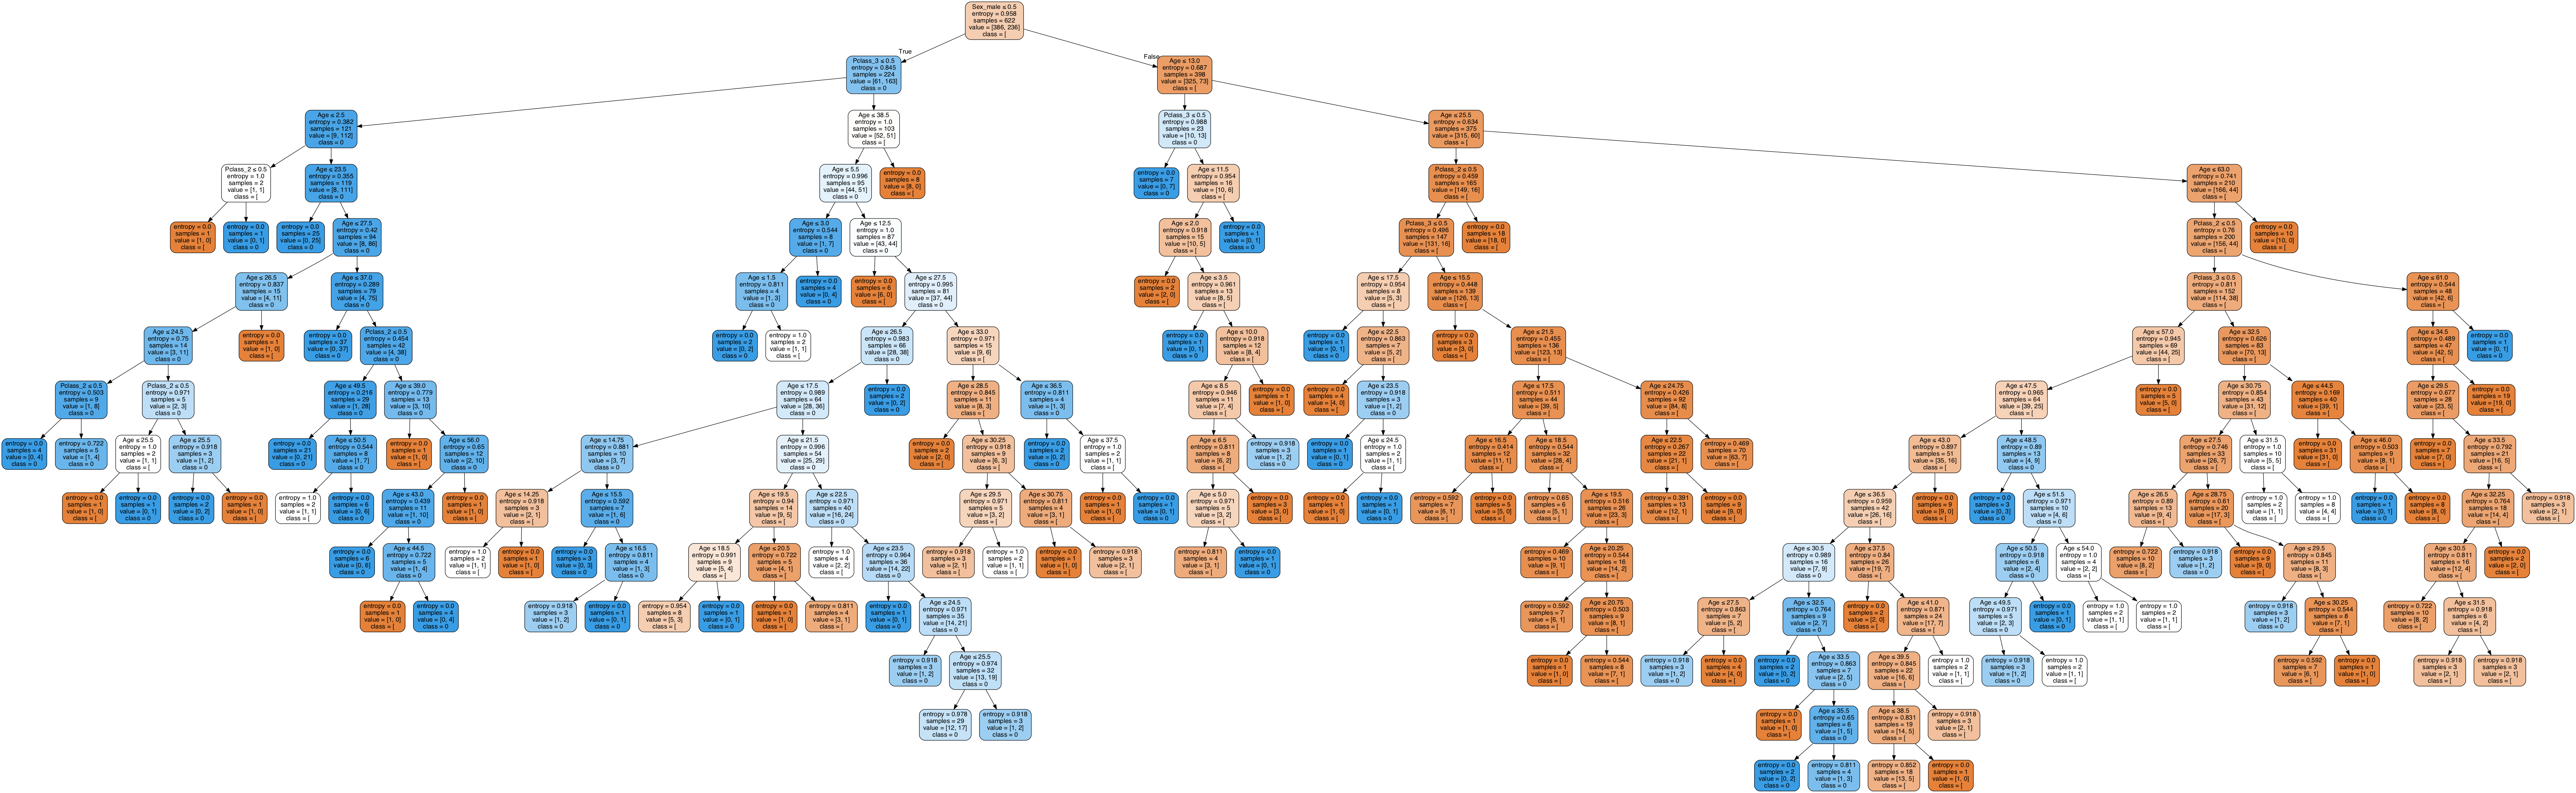

In [94]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [79]:
pred = dectree.predict(xtest)

In [95]:
pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

In [96]:
z = []
for i, j in zip(pred, ytest):
    z.append([i,j])
pd.DataFrame(z).head()

0  1
0  0  0
1  0  0
2  1  1
3  1  1
4  0  0

In [97]:
accuracy_score(pred, ytest)*100

78.27715355805243

In [98]:
CM = pd.DataFrame (confusion_matrix(ytest, pred), columns = ['Prediksi Not Survive', 'Prediksi Survive'], 
                  index = ['Actual Not Survive', 'Actual Survive'])
CM

Prediksi Not Survive  Prediksi Survive
Actual Not Survive                   135                28
Actual Survive                        30                74

## Latihan 2

In [100]:
from sklearn.datasets import load_iris

In [103]:
iris = load_iris()

In [104]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [105]:
x = iris['data']
y = iris['target']

In [106]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=101)

In [108]:
dectree = DecisionTreeClassifier(criterion = 'entropy')

In [109]:
dectree.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

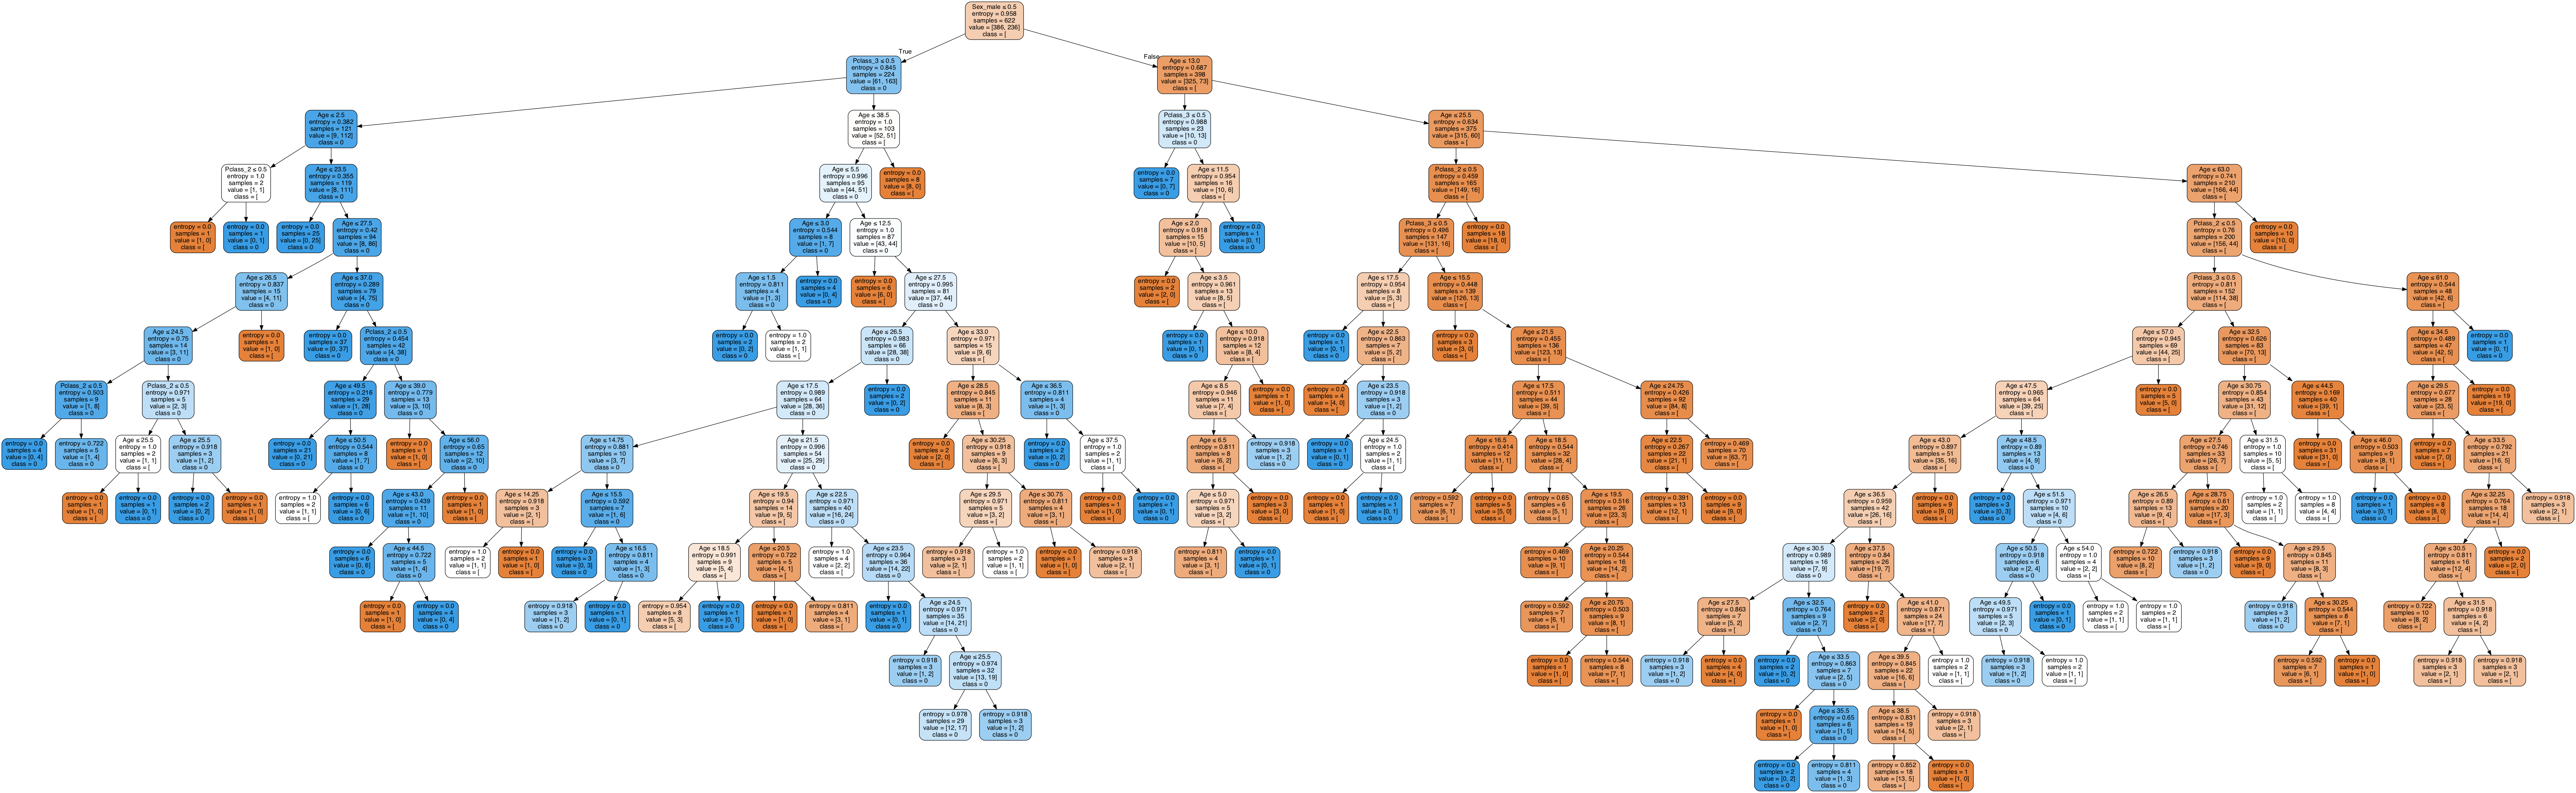

In [110]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [111]:
pred = dectree.predict(xtest)

In [112]:
z = []
for i, j in zip(pred, ytest):
    z.append([i,j])
pd.DataFrame(z).head()

0  1
0  0  0
1  0  0
2  0  0
3  1  2
4  1  1

In [113]:
accuracy_score(pred, ytest)*100

95.55555555555556